####1a) Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [88]:
import pandas as pd
import numpy as np
from numpy import *

In [89]:
#Read the dataset and make sure to use na_values parameters to track down all the na and missing values.
ccData=pd.read_csv('./communities/communities.csv', na_values=["?"])

In [90]:
ccData.shape

(1994, 100)

In [91]:
ccData.head(5)

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [92]:
#Check any missing or na values
missing_tab=ccData.isnull().sum(0)
missing_tab[missing_tab>0]

OtherPerCap    1
dtype: int64

Based on the above, there is one missing value from on the attribute 'OtherPerCap'

In [93]:
#Fill in the missing value in the 'OtherPerCap' attribute by its MEAN value 
ccData.OtherPerCap.fillna(ccData.OtherPerCap.mean(axis=0), axis=0,inplace=True)

In [95]:
#Double check if there is any more missing values
missing_tab=ccData.isnull().sum(0)
missing_tab[missing_tab>0]

Series([], dtype: int64)

In [96]:
#Now we check on the statistics of every attribute
ccData.describe().T

,count,mean,std,min,25%,50%,75%,max
state,1994.0,28.683551,16.397553,1.0,12.0000,34.000,42.0000,56.0
population,1994.0,0.057593,0.126906,0.0,0.0100,0.020,0.0500,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.3500,0.440,0.5400,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.0200,0.060,0.2300,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.6300,0.850,0.9400,1.0
racePctAsian,1994.0,0.153681,0.208877,0.0,0.0400,0.070,0.1700,1.0
racePctHisp,1994.0,0.144022,0.232492,0.0,0.0100,0.040,0.1600,1.0
agePct12t21,1994.0,0.424218,0.155196,0.0,0.3400,0.400,0.4700,1.0
agePct12t29,1994.0,0.493867,0.143564,0.0,0.4100,0.480,0.5400,1.0
agePct16t24,1994.0,0.336264,0.166505,0.0,0.2500,0.290,0.3600,1.0


In [97]:
#Split the original table into predictor set and target variable
x=ccData.ix[:,0:-1] #Predictor set
y=ccData.ViolentCrimesPerPop # Target/Response variable

In [98]:
#Drop the identifier attribute 'state'
x.drop('state', axis=1,inplace=True)

In [99]:
#Drop the identifier attribute 'communityname'
x.drop('communityname', axis=1,inplace=True)

In [100]:
#Check on predictor variables statistics
x.describe().T

,count,mean,std,min,25%,50%,75%,max
population,1994.0,0.057593,0.126906,0.0,0.0100,0.020,0.0500,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.3500,0.440,0.5400,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.0200,0.060,0.2300,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.6300,0.850,0.9400,1.0
racePctAsian,1994.0,0.153681,0.208877,0.0,0.0400,0.070,0.1700,1.0
racePctHisp,1994.0,0.144022,0.232492,0.0,0.0100,0.040,0.1600,1.0
agePct12t21,1994.0,0.424218,0.155196,0.0,0.3400,0.400,0.4700,1.0
agePct12t29,1994.0,0.493867,0.143564,0.0,0.4100,0.480,0.5400,1.0
agePct16t24,1994.0,0.336264,0.166505,0.0,0.2500,0.290,0.3600,1.0
agePct65up,1994.0,0.423164,0.179185,0.0,0.3000,0.420,0.5300,1.0


In [102]:
#Check on the target variable statistic
y.describe().T

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64

####1b) Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you may use the KFold module from sklearn.cross_validation).

In [206]:
x1=np.array(x)
y1=np.array(y)
# Should to add a column of ONEs for x0 in order to do multiple regression
x1=np.array([np.concatenate((v,[1])) for v in x1])


In [207]:
#MLA Functions from textbook Machine Learning in Action, Chapter 8:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [208]:
w_standRegres=standRegres(x1,y1)
w_standRegres

matrix([[  1.31108068e-01],
        [ -3.14114977e-02],
        [  2.09909670e-01],
        [ -4.05351612e-02],
        [ -1.38892919e-02],
        [  5.89726825e-02],
        [  1.23399025e-01],
        [ -2.22621600e-01],
        [ -1.47500199e-01],
        [  5.01635477e-02],
        [ -2.42413829e-01],
        [  4.64024392e-02],
        [ -1.96945615e-01],
        [ -2.06117500e-01],
        [  4.65935490e-02],
        [ -1.77212915e-01],
        [  6.30148504e-02],
        [  1.14942190e-02],
        [ -9.08951848e-02],
        [  2.74640044e-01],
        [  1.01752476e-01],
        [ -3.31517562e-01],
        [ -2.91799268e-02],
        [ -3.54483393e-02],
        [  2.26173855e-02],
        [  4.30950137e-02],
        [  3.44408548e-02],
        [  1.28412458e-01],
        [ -1.91293360e-01],
        [ -1.00769002e-01],
        [  6.46856092e-02],
        [  1.06062117e-01],
        [  2.44126016e-06],
        [  2.34984611e-01],
        [ -3.75705330e-02],
        [ -7.7495766

In [209]:

x1=np.mat(x1)
predict_y=np.dot(x1,w_standRegres) #Predict the dependent variable based on the above calculated weights 
predict_y.shape

(1994, 1)

In [212]:
predict_y=np.array(predict_y).T

In [213]:
predict_y2=predict_y[0]
predict_y2.shape

(1994,)

In [214]:
# Now we can constuct a vector of errors
err = abs(predict_y2-y1.T)
err=np.mat(err)

In [236]:
rmse_train=np.sqrt(np.dot(err,err.T) / len(predict_y2))

#rmse_train=(np.array(rmse_train)[0])
#rmse_train=rmse_train[0]


The Training RMSE is 0.12889


In [260]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold

# Create linear regression object
linreg = LinearRegression()
n = 10
kf = KFold(len(x1), n_folds=n)
xval_err = 0
for train,test in kf:
    linreg.fit(x1[train],y1[train])
    p = linreg.predict(x1[test])
    e = p-y1[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x1[test]))
       
rmse_10cv = xval_err/n

In [266]:
print('The Training RMSE is %0.5f'%(rmse_train))
print('The 10fold RMSE is %0.5f'%(rmse_10cv))

The Training RMSE is 0.12889
The 10fold RMSE is 0.13586


Based on the above, the RMSE between Training and 10-fold are very close. 

In [276]:
import matplotlib.pyplot as plt
%matplotlib inline

In [271]:
#Actual Target Value from original Data
y1.shape

(1994,)

In [270]:
#Predicted value from the
predict_y2.shape

(1994,)

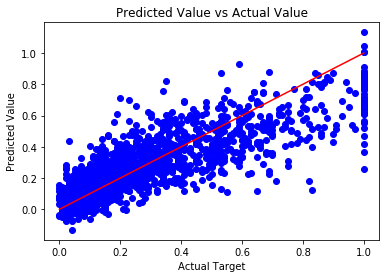

In [415]:
#Plot the Predicted Value vs Actual Value
plt.plot(y1,predict_y2,'ro', color='blue')
plt.plot([0,1],[0,1],'red')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Value')
plt.title('Predicted Value vs Actual Value')
plt.show()

In [286]:
#Correlation between predicted value and Actual Value
corrcoef(predict_y2, y1)

array([[ 1.  ,  0.83],
       [ 0.83,  1.  ]])

####1c) Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target attribute; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection.]

In [1]:
from sklearn.cross_validation import train_test_split
x1=np.array(x1)
x_train, x_test, y_train, y_test = train_test_split(x1, y1.T, test_size=0.2, random_state=55)

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'np' is not defined

In [340]:
x_train.shape

(1595, 98)

In [294]:
y_train.shape

(1595,)

In [295]:
x_test.shape

(399, 98)

In [327]:
y_test.shape

(399,)

In [303]:
type(y_train)

numpy.ndarray

In [373]:
from sklearn import feature_selection
from sklearn import cross_validation

# Create linear regression object
linreg = LinearRegression()
results=[]
n_fold=5 #Set number of fold =5
percentiles = range(1, 100, 5) #Pre-set the the precentile
for i in range(1,100,n_fold):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression ,percentile=i)
    x_train_fs = fs.fit_transform(x_train,y_train)
    scores = abs(cross_validation.cross_val_score(linreg,x_train_fs,y_train,cv=5,scoring='mean_absolute_error'))
    print(i,scores.mean())
    results = np.append(results, scores.mean())

    


/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users

1 0.113943060315
6 0.101191612456
11 0.101175759705
16 0.101243083971
21 0.0995874757738
26 0.0982839780838
31 0.0976837268074
36 0.0971086224375
41 0.0966454393648
46 0.0974334227416
51 0.097762665564


/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/KevQuant/anaconda/lib/python3.6/site-package

56 0.0979647775442
61 0.0987830572765
66 0.099202338531
71 0.0995516982625
76 0.0984921834617
81 0.098671167702
86 0.0985200638453
91 0.0990166587181
96 0.098333824917


/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid 

In [385]:
percentiles = range(1, 100, 5)
optimal_percentile = np.where(results == results.min())[0]
print('Optimal percentile of features:',percentiles[optimal_percentile])
optimal_num_features = (int(percentiles[optimal_percentile])/100) * len(x.columns)
print('Optimal number of features: %2d' %(optimal_num_features))

Optimal percentile of features: 41
Optimal number of features: 39


/Users/KevQuant/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/KevQuant/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  after removing the cwd from sys.path.


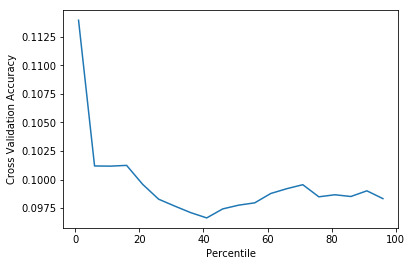

In [376]:
plt.plot(percentiles,results)
plt.xlabel('Percentile')
plt.ylabel('Cross Validation Accuracy')
plt.show()

In [408]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=41)
x_train_fs = fs.fit_transform(x_train, y_train)

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [409]:
#The following shows the optimal features and their scores
for i in range(len(x.columns.values)):
    if fs.get_support()[i]:
        print (x.columns.values[i], '\t', fs.scores_[i])

population 	 208.41261328
racepctblack 	 1047.17072994
racePctWhite 	 1378.54255124
numbUrban 	 203.280067113
medIncome 	 340.039081698
pctWInvInc 	 759.277958878
pctWPubAsst 	 775.367280937
medFamInc 	 369.968950665
perCapInc 	 214.476272283
NumUnderPov 	 351.350284421
PctPopUnderPov 	 601.321078238
PctLess9thGrade 	 350.660916764
PctNotHSGrad 	 501.428584848
PctBSorMore 	 170.828982428
PctUnemployed 	 535.048270241
PctEmploy 	 202.929512551
MalePctDivorce 	 600.416653191
FemalePctDiv 	 694.198504598
TotalPctDiv 	 686.288270843
PctFam2Par 	 1577.7293989
PctKids2Par 	 1878.58699592
PctYoungKids2Par 	 1255.59323019
PctTeen2Par 	 1236.42780275
NumIlleg 	 426.473129708
PctIlleg 	 1873.74692879
PctNotSpeakEnglWell 	 174.364894226
PctLargHouseFam 	 285.663993303
PctPersOwnOccup 	 609.905473623
PctPersDenseHous 	 426.422975995
PctHousLess3BR 	 462.104835912
MedNumBR 	 229.82615215
HousVacant 	 315.227840688
PctHousOccup 	 178.762852021
PctHousOwnOcc 	 446.41763617
PctVacantBoarded 	 456.4409

####1d) Next, perform Ridge Regression and Lasso Regression, however this time use the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. You should create a function that takes as input the data and target attribute; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.zeros(3)

array([ 0.,  0.,  0.])